In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils

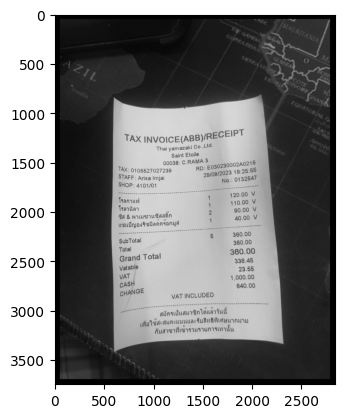

In [2]:
img = cv.imread('./Crop_dataset/Feature/img14.jpg')
ori_img = img.copy()
img = np.pad(img, ((50,50),(50,50),(0,0)), 'constant', constant_values=0)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))

### keep

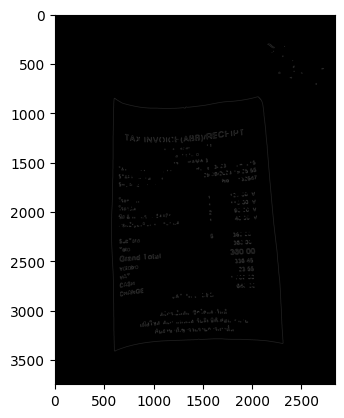

In [3]:
bfilter = cv.bilateralFilter(gray, 20, 17, 17) #Noise reduction
blurred = cv.GaussianBlur(gray, (25, 25), 0) #Noise reduction
ret, thresh = cv.threshold(blurred, 127, 255, 0)
edged = cv.Canny(thresh, 10, 10) #Edge detection
plt.imshow(cv.cvtColor(edged, cv.COLOR_BGR2RGB))

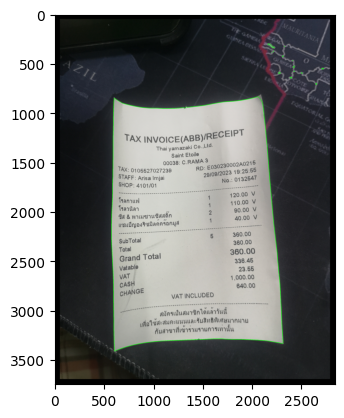

In [4]:
contours, hierarchy = cv.findContours(edged,  
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) 
cv.drawContours(img, contours, -1, (0, 255, 0), 3) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [5]:
keypoints = cv.findContours(edged.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv.contourArea, reverse=True)

### keep

In [6]:
location = None
height, width, _ = img.shape
max_area = 0
check = False
for contour in contours:
    epsilon = 0.02 * cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, epsilon, True)
    
    if len(approx) == 4:
        location = approx
        break

# If no suitable rectangle is found, use a default rectangle or area > 1/3 of image
if location is None or cv.contourArea(location) < (height*width)/3:
    location = np.array([[0, 0], [0, height], [width, height], [width, 0]])
    check = True

print(location)

[[[2061  840]]

 [[ 600  853]]

 [[ 602 3413]]

 [[2309 3335]]]


In [7]:
location

array([[[2061,  840]],

       [[ 600,  853]],

       [[ 602, 3413]],

       [[2309, 3335]]], dtype=int32)

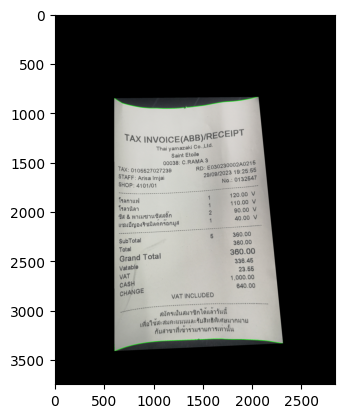

In [8]:
# show the location in the image
mask = np.zeros(gray.shape, np.uint8)
new_image = cv.drawContours(mask, [location], 0,255, -1)
new_image = cv.bitwise_and(img, img, mask=mask)
plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

### show

In [10]:
# remove padding
if check:
    cropped_image = cropped_image[50:-50,50:-50]
# plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))

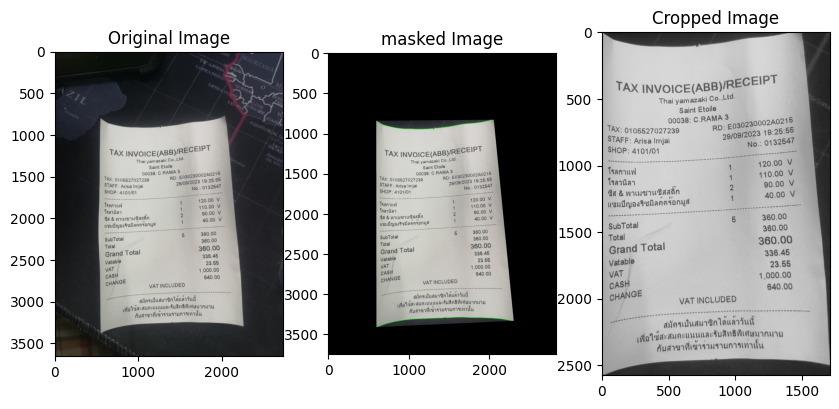

In [11]:
# compare the cropped image with the original image and label it
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Original Image')
ax1.imshow(cv.cvtColor(ori_img, cv.COLOR_BGR2RGB))

ax2 = fig.add_subplot(2,3,2)
ax2.set_title('masked Image')
ax2.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))

ax3 = fig.add_subplot(2,3,3)
ax3.set_title('Cropped Image')
ax3.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))